# Exploratory Data Analysis

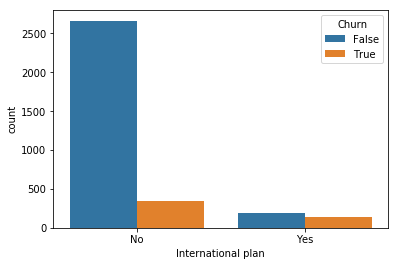

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read_csv file is a panda fucntion which will read the data into a variable
df = pd.read_csv('C:\\Users\\m1043057\\Documents\\Python Scripts\\Data Sets\\telecom_churn.csv')

# head() function will give first 5 rows of the csv file
df.head()

# tail() funciton will give last 5 rows of the csv file
df.tail()

# Both the below code will give all the value where Churn column = True
df[df.Churn == True]
df[df['Churn'].apply(lambda Churn: Churn == True)].head()

# describe() shows basic statistical characteristics of each numerical feature
#false_data = df[df.Churn == False].describe()
#true_data = df[df.Churn == True].describe()

# to_csv() will write the data into destined file. to should be csv extension itself
#false_data.to_csv('C:\\Users\\m1043057\\Documents\\Python Scripts\\Data Sets\\false_churn.csv')
#true_data.to_csv('C:\\Users\\m1043057\\Documents\\Python Scripts\\Data Sets\\true_churn.csv')

# info gives what kind of data type the columns are
#df.info()

# value_counts() function gives count of different type of values present in the column
df['Churn'].value_counts()

# mean() will fetch the mean value of that specified column
#df['Churn'].mean() # 14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

# time (on average) do churned users spend on the phone during daytime
#df[df['Churn'] == True]['Total day minutes'].mean()

# the maximum length of international calls among loyal users (Churn == False) who do not have an international plan
#df[(df['Churn'] == True) & (df['International plan'] == 'No')]['Total intl minutes'].max()


# replace the values by using dict to specific column using map function
#d = {False: 0, True: 1}
#df['Churn'] = df['Churn'].map(d)


# 1. First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
# 2. Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
# 3. Finally, one or several functions are applied to the obtained groups per selected columns.
columns_to_show = ['Total day minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].describe()


#Shows the crosstab between Churn and INternational Plan. 
#Clearly it shows, the loyal customers did not opt for International Plan
pd.crosstab(df['Churn'], df['International plan'])


# Shows the crosstab between Churn and INternational Plan. 
# Clearly it shows, the loyal customers did not opt for Voice Mail Plan
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize = True)


# Take a look at the average number of day, evening, and night calls by area code
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],['Area code'], aggfunc = 'mean')


#DataFrame Transformations
# Let us see by adding total calls did across and add as new column to our data frame
total_calls = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value = total_calls)
df.head()


# Similarly let us see by adding total charge for those calls and add as new column to our data frame
total_charge = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
df.insert(loc=len(df.columns), column = 'Total charge', value = total_charge)
df.head()


# get rid of just created columns
df.drop(['Total calls', 'Total charge'], axis = 1, inplace = True)
df.head()


# Let us attempt to predict telecom churn
pd.crosstab(df['Churn'], df['International plan'], margins = True)


sns.countplot(x='International plan', hue = 'Churn', data = df)
# Interesting observation is the customers with International Plan has churn rate high.
# Meaning the telecom is providing very bad service for the International package due to which they're losing customers

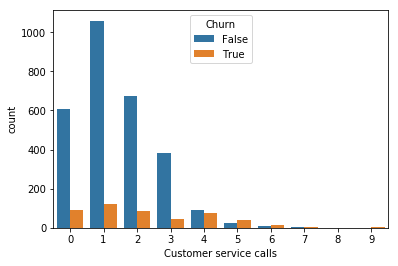

In [173]:

plo = pd.crosstab(df['Churn'], df['Customer service calls'])
plo

sns.countplot(x='Customer service calls', hue='Churn', data=df)